Stops Analyzer

In [4]:
import pandas as pd
import oracledb
import MetroDeMadrid_db #importing db connection for security
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
try:
    #connecting to the database. Imported the function for security
    connection = MetroDeMadrid_db.get_connection()
    #initializing the cursor
    cursor = connection.cursor()

    #The below query is to fetch all the information from the table #stops
    query = "SELECT * FROM stops"

    # Execute the query
    cursor.execute(query)
    
    rows = cursor.fetchall() # Fetch all rows
    columns = [desc[0] for desc in cursor.description]  #extract the column names, as the above query doesnt return column names

    rows_df = pd.DataFrame(rows, columns=columns)
    
except Exception as e:
    print(f"Error connecting to the database: {e}")

In [13]:
rows_df.head()

,STOP_ID,STOP_CODE,STOP_NAME,STOP_DESC,STOP_LAT,STOP_LON,ZONE_ID,STOP_URL,LOCATION_TYPE,PARENT_STATION,STOP_TIMEZONE,WHEELCHAIR_BOARDING
0,par_4_1,1,PLAZA DE CASTILLA,Paseo de la Castellana 189,40.46690,-3.68917,A,http://www.crtm.es,0,est_90_21,None,0
1,acc_4_1_1,1,Plaza de Castilla,Paseo de la Castellana 189,40.46682,-3.68918,None,http://www.crtm.es,2,est_90_21,None,0
2,acc_4_1_1040,1,Ascensor,Plaza de Castilla 9,40.46555,-3.68877,None,http://www.crtm.es,2,est_90_21,None,0
3,acc_4_1_1043,1,Intercambiador Superficie,Paseo de la Castellana 191 B,40.46728,-3.68915,None,http://www.crtm.es,2,est_90_21,None,0
4,acc_4_1_1044,1,Ascensor,Paseo de la Castellana 189,40.46702,-3.68918,None,http://www.crtm.es,2,est_90_21,None,0


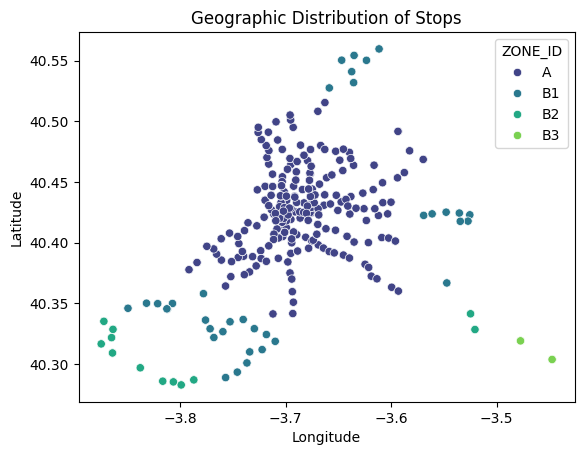

In [20]:
sns.scatterplot(data=rows_df, x='STOP_LON', y='STOP_LAT', hue='ZONE_ID', palette='viridis')
plt.title("Geographic Distribution of Stops")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()